In [1]:
import numpy as np
import pandas as pd
import math
from sklearn import preprocessing, svm
# import models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import style
import datetime


In [2]:
import yfinance as yf

In [3]:
tickers = yf.Ticker('AAPL MSFT GOOG IBM')
ticker = 'AAPL'

In [4]:
start_period = '2005-01-01'
end_period = '2019-01-01'

In [23]:
stock_data = yf.download(ticker, start=start_period, end=end_period)
stock_data.tail()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-24,148.15,151.55,146.59,146.83,145.09,37169200
2018-12-26,148.30,157.23,146.72,157.17,155.31,58582500
2018-12-27,155.84,156.77,150.07,156.15,154.30,53117100
2018-12-28,157.50,158.52,154.55,156.23,154.38,42291400
2018-12-31,158.53,159.36,156.48,157.74,155.87,35003500


In [6]:
date = np.array(stock_data.index)
price = np.array(stock_data.Close)

In [37]:
dfreg = stock_data.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (stock_data['High'] - stock_data['Low']) / stock_data['Close'] * 100.0
dfreg['PCT_change'] = (stock_data['Close'] - stock_data['Open']) / stock_data['Open'] * 100.0

In [36]:
dfreg = stock_data.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (stock_data['High'] - stock_data['Low']) / stock_data['Close'] * 100.0
dfreg['PCT_change'] = (stock_data['Close'] - stock_data['Open']) / stock_data['Open'] * 100.0
dfreg.tail(), stock_data.tail()

(            Adj Close    Volume    HL_PCT  PCT_change
 Date                                                 
 2018-12-24     145.09  37169200  3.378056   -0.890989
 2018-12-26     155.31  58582500  6.687027    5.981119
 2018-12-27     154.30  53117100  4.290746    0.198922
 2018-12-28     154.38  42291400  2.541125   -0.806349
 2018-12-31     155.87  35003500  1.825789   -0.498328,
               Open    High     Low   Close  Adj Close    Volume
 Date                                                           
 2018-12-24  148.15  151.55  146.59  146.83     145.09  37169200
 2018-12-26  148.30  157.23  146.72  157.17     155.31  58582500
 2018-12-27  155.84  156.77  150.07  156.15     154.30  53117100
 2018-12-28  157.50  158.52  154.55  156.23     154.38  42291400
 2018-12-31  158.53  159.36  156.48  157.74     155.87  35003500)

In [33]:
dfreg.tail(), stock_data.tail()

(            Adj Close  Volume  HL_PCT  PCT_change  Label  Forecast
 Date                                                              
 2019-02-01        NaN     NaN     NaN         NaN    NaN       NaN
 2019-02-02        NaN     NaN     NaN         NaN    NaN       NaN
 2019-02-03        NaN     NaN     NaN         NaN    NaN       NaN
 2019-02-04        NaN     NaN     NaN         NaN    NaN       NaN
 2019-02-05        NaN     NaN     NaN         NaN    NaN       NaN,
               Open    High     Low   Close  Adj Close    Volume
 Date                                                           
 2018-12-24  148.15  151.55  146.59  146.83     145.09  37169200
 2018-12-26  148.30  157.23  146.72  157.17     155.31  58582500
 2018-12-27  155.84  156.77  150.07  156.15     154.30  53117100
 2018-12-28  157.50  158.52  154.55  156.23     154.38  42291400
 2018-12-31  158.53  159.36  156.48  157.74     155.87  35003500)

In [8]:
dfreg.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(dfreg)))
forecast_col = 'Adj Close'
dfreg['Label'] = dfreg[forecast_col].shift(-forecast_out)

In [9]:
 X = np.array(dfreg.drop(['Label'], 1))
 X = preprocessing.scale(X)
    
# Find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

# Separate label and identify it as y
y = np.array(dfreg['Label'])
y = y[:-forecast_out]
y_lately = y[-forecast_out:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
dfreg.tail()

,Adj Close,Volume,HL_PCT,PCT_change,Label,Forecast
Date,,,,,,
2019-02-01,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-02,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-03,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-04,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-05,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [12]:
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [13]:
# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [14]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [15]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)

model_descriptions = ['Linear Regression', 'Quadratic Regression 2', 
                      'Quadratic Regression 3', 'KNN Regression' ]

confidence_results = [confidencereg, confidencepoly2, 
                      confidencepoly3, confidenceknn]

In [16]:
def print_confidence(confidence_results, model_descriptions):
    length = len(confidence_results)
    if length == len(model_descriptions):
        [print(f'The {model_descriptions[i]} confidence is {round(100*confidence_results[i],2)}%') for i in range(0,length)] 
    else:
        print('Number of models and number of confidence results are not equal')
    

In [17]:
print_confidence(confidence_results, model_descriptions)

The Linear Regression confidence is 97.4%
The Quadratic Regression 2 confidence is 97.64%
The Quadratic Regression 3 confidence is 97.89%
The KNN Regression confidence is 96.93%


In [29]:
forecast_set = clfreg.predict(X_lately)
dfreg['Forecast'] = np.nan

,Adj Close,Volume,HL_PCT,PCT_change,Label,Forecast
Date,,,,,,
2004-12-31,4.01,69647200.0,1.521739,-0.862069,5.50,NaN
2005-01-03,3.95,172998000.0,3.982301,-2.375810,5.54,NaN
2005-01-04,3.99,274202600.0,3.938731,0.219298,5.55,NaN
2005-01-05,4.02,170108400.0,1.952278,0.217391,5.59,NaN
2005-01-06,4.02,176388800.0,2.603037,-0.216450,5.55,NaN
...,...,...,...,...,...,...
2019-02-01,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-02,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-03,NaN,NaN,NaN,NaN,NaN,NaN


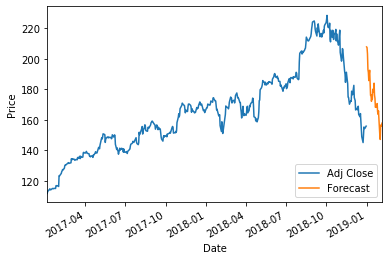

In [19]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
stock_data['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [22]:
dfreg.tail(), stock_data.tail(), 

(            Adj Close  Volume  HL_PCT  PCT_change  Label    Forecast
 Date                                                                
 2019-02-01        NaN     NaN     NaN         NaN    NaN  147.135342
 2019-02-02        NaN     NaN     NaN         NaN    NaN  156.551324
 2019-02-03        NaN     NaN     NaN         NaN    NaN  155.901467
 2019-02-04        NaN     NaN     NaN         NaN    NaN  156.223623
 2019-02-05        NaN     NaN     NaN         NaN    NaN  157.809671,
               Open    High     Low   Close  Adj Close    Volume
 Date                                                           
 2018-12-24  148.15  151.55  146.59  146.83     145.09  37169200
 2018-12-26  148.30  157.23  146.72  157.17     155.31  58582500
 2018-12-27  155.84  156.77  150.07  156.15     154.30  53117100
 2018-12-28  157.50  158.52  154.55  156.23     154.38  42291400
 2018-12-31  158.53  159.36  156.48  157.74     155.87  35003500)

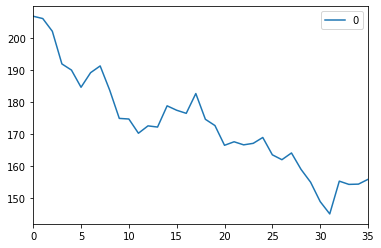

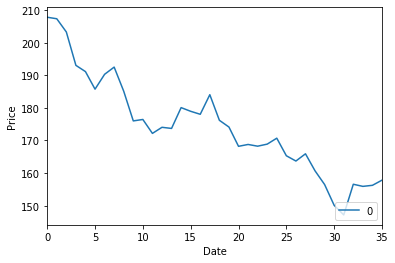

In [21]:
pd.DataFrame(y_lately).plot()
pd.DataFrame(forecast_set).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()